# Линейная регрессия

Задача прогноза вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной ошибки. Рассмотрим линейную регресси на примере листка ириса. Будем предсказывать длину листка по его ширине. x - ширина листа, y - длина листка.

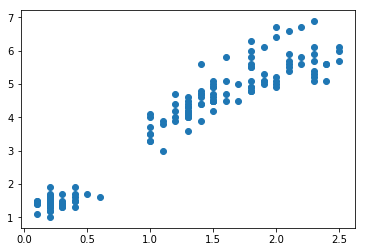

In [37]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = load_iris().data
x = data[:,3]
y = data[:,2]
plt.scatter(x, y)
# plt.show()

Напишите функцию, которая по двум параметрам  $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости длины листа $y$ от ширины листа $x$ прямой линией $y = w_0 + w_1 * x$:

$$E(w_0, w_1) = \frac{1}{n}\sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$ Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – длина и ширина листа ириса для $i$-ого объекта в наборе данных.

In [38]:
def square_error(w0, w1):
    e = 0
    for i,j in zip(x,y):
        e+=(j-(w0+w1+i))**2
    e/=len(x)
    return e

square_error(2,3)

7.0588000000000015

Возьмите параметры $\omega_0$ - свободный член и $\omega_1$ - наклон прямой и постройте две любые прямые, которые быдут некоторым образом описывать зависмость ширины листа от его длины. Представьте графически.

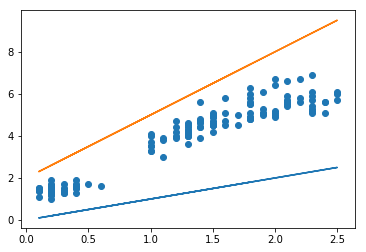

In [39]:
lineFunc = lambda x, w0, w1: w0 + w1 * x
plt.plot(x,lineFunc(x, 0,1))
plt.plot(x,lineFunc(x, 2,3))
plt.scatter(x, y)


Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Рассмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

Постройте график зависимости функции ошибки от параметра $w_1$ при $w_0$ = 0.

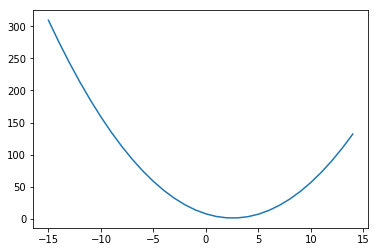

In [40]:
a= range(-15, 15)
b = []
for i in a:
    b.append(square_error(0,i))
plt.plot(a, b)


С помощью метода minimize_scalar из scipy.optimize найдите минимум функции, определенной выше, для значений параметра  $w_1$ в диапазоне [-10,10]. Проведите на графике прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное в оптимальное значение параметра $w_1$.

In [41]:
from scipy.optimize import minimize_scalar
minScal = minimize_scalar(lambda w1: square_error(50, w1), bounds=[-10, 10], method='bounded')
minScal.x

-9.99999335625205

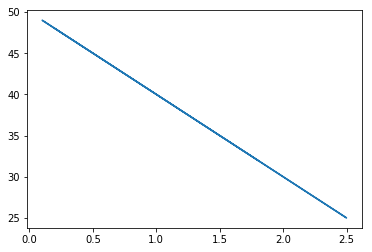

In [42]:
plt.plot(x, lineFunc(x,50,minScal.x))

В связи с тем, что у нас требуется найти минимальное значение функции по $w_0$, $w_1$ следовательно функция ошибки будет находиться в трехмерном пространстве.
Пример построения трехмерных графиков находится ниже.

In [0]:
from mpl_toolkits.mplot3d import Axes3D

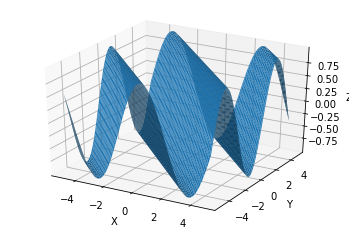

In [44]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.sin(X + Y)


surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

Постройте график зависимости функции ошибки в трехмерном пространстве от параметров $\omega_0$ и $\omega_1$.

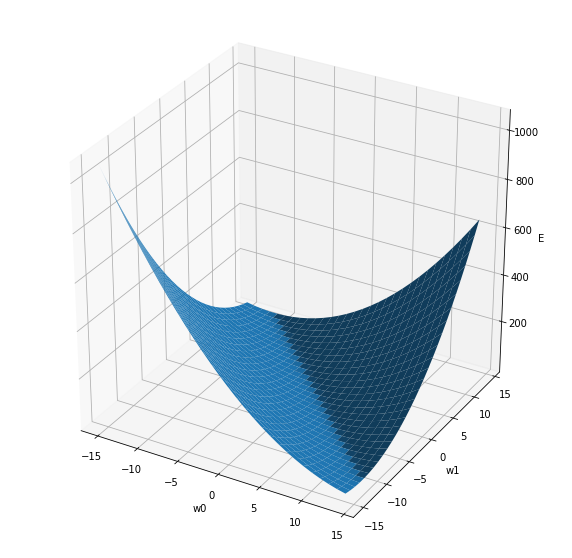

In [79]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d') # get current axis

a,b= [],[]
for i in range(-15,15):
    a.append(i)
    b.append(i)

X = a
Y = b
X, Y = np.meshgrid(X, Y)
Z = square_error(X,Y)

surf = ax.plot_surface(Y, X, Z)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('E')
plt.show()

Используя метод minimize найдите минимум функции. Диапазон поиска подберите самостоятельно. Начальная точка - (0,0). Постройте прямую на графике с данными.

In [77]:
from scipy.optimize import minimize


def minimizable_square_error(args):
    e = 0
    w0,w1 = args
    for i,j in zip(x,y):
        e+=(j-(w0+w1+i))**2
    e/=len(x)
    return e


minimize(minimizable_square_error,x0 = (0,0))



      fun: 1.0986915555555608
 hess_inv: array([[ 0.625, -0.375],
       [-0.375,  0.625]])
      jac: array([1.34110451e-07, 1.34110451e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.27933337, 1.27933337])

Проверьте полученные результаты аналитическим методом поиска корней СЛАУ использованным на лекции.

In [0]:
# code here